## The Context

As we saw in the last post, we can use FFT Phase Correlation to find the x & y translation between two images/arrays. However, what if there is a rotation between two images/arrays instead?

This is a problem when comparing two mini-maps where the player might have rotated between them.

One solution is the Log-Polar transformation, which transforms the image from x,y space to $\rho$,$\theta$ space. In $\rho$,$\theta$ space, scaling and rotation between the two images manifest as 2d translations. Once we have identified the rotation between the two images, we can correct it before finding the 2d translation.

While understanding this process, I found this excellent [explanation](https://sthoduka.github.io/imreg_fmt/docs/overall-pipeline/) by Santosh Thoduka, which helped make things much clearer for me. Scikit-image also has a good [demo](https://scikit-image.org/docs/stable/auto_examples/registration/plot_register_rotation.html#sphx-glr-auto-examples-registration-plot-register-rotation-py), from which I learnt a lot.

## The Log Polar Transform

The log polar transform points from (x,y) to ($\rho$,$\theta$) as follows:

$\rho = \ln\sqrt{x^2 + y^2}$

$\theta = atan2(y-y_c,x-x_c)$

To help visualise this process, let's experiment with *Mondarian's Tableau I*.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io
import skimage.transform

plt.rcParams['figure.figsize'] = [10, 10]

First, let's load and plot the image:

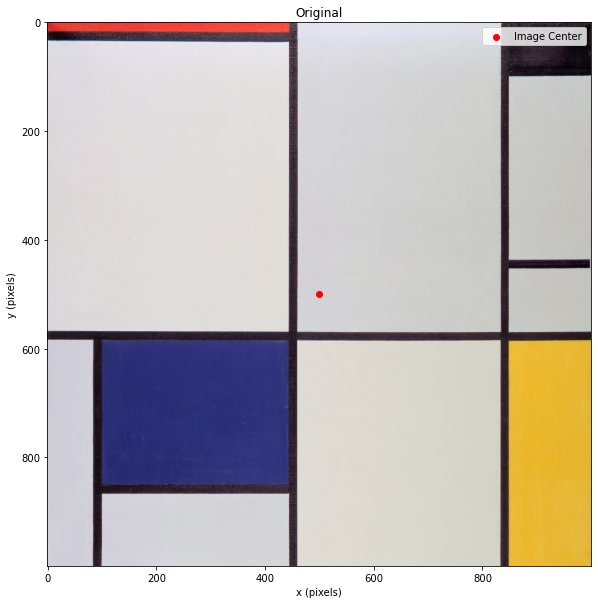

In [2]:
mondarin = skimage.io.imread('data/2020-12-20-FFT-Phase-Correlation-Rotation/mondrian.jpg')
mondarin = mondarin[0:1000,0:1000,:]
shape = mondarin.shape

plt.title('Original')
plt.scatter(shape[0]/2,shape[1]/2,color='r',label = 'Image Center')
plt.imshow(mondarin)
plt.legend()
plt.xlabel('x (pixels)')
plt.ylabel('y (pixels)')
plt.show()

Now let's compute the Log Polar Transform of the image and visualise that as well:

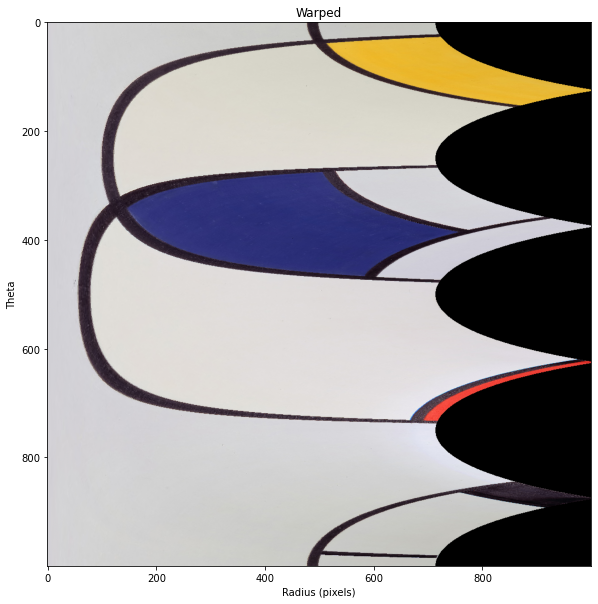

In [3]:
monarin_warped = skimage.transform.warp_polar(mondarin, radius=700, output_shape=shape, scaling='linear', order=0, multichannel=True)

plt.title('Warped')
plt.imshow(monarin_warped)
plt.xlabel('Radius (pixels)')
plt.ylabel('Theta')
plt.show()

Now let's rotate the Mondrian to understand the power of the log-polar transform better.

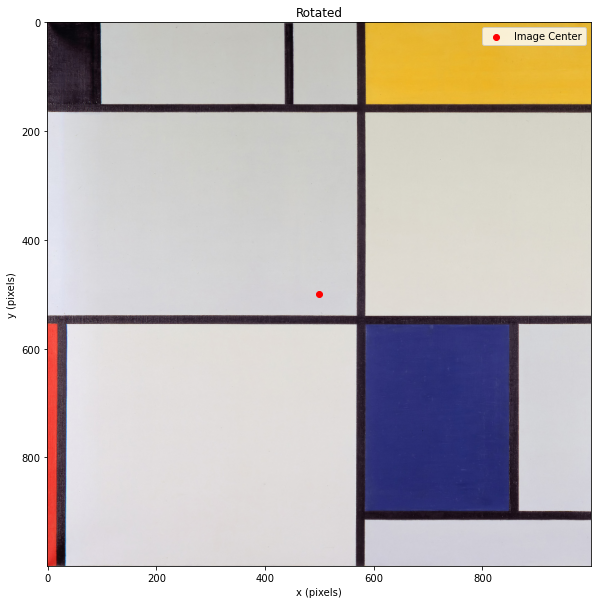

In [4]:
mondarin_rotated = skimage.transform.rotate(mondarin, 90)

plt.title('Rotated')
plt.scatter(shape[0]/2,shape[1]/2,color='r',label = 'Image Center')
plt.imshow(mondarin_rotated)
plt.legend()
plt.xlabel('x (pixels)')
plt.ylabel('y (pixels)')
plt.show()

By comparing the original and the rotated *Mondrian*, we can see that a rotation in the original domain corresponds to a translation/shift in the log-polar domain.

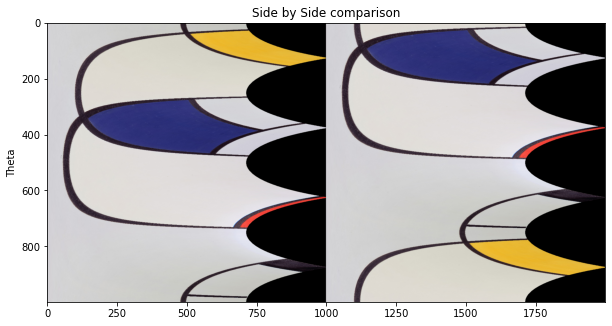

In [5]:
monarin_rotated_warped = skimage.transform.warp_polar(mondarin_rotated, radius=700, output_shape=shape, scaling='linear', order=0, multichannel=True)

plt.title('Side by Side comparison')
plt.imshow(np.hstack([monarin_warped,monarin_rotated_warped]))
plt.ylabel('Theta')
plt.show()

You can read about the Log Polar Transform in more detail [here](https://sthoduka.github.io/imreg_fmt/docs/log-polar-transform/).